In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv("Bike-Sharing-Dataset/day.csv")

In [3]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [5]:
df['percent_casual'] = df['casual'] / df['cnt']
df['percent_registered'] = df['registered'] / df['cnt']
df['season'][df['season'] == 1] = 'Winter'
df['season'][df['season'] == 2] = 'Spring'
df['season'][df['season'] == 3] = 'Summer'
df['season'][df['season'] == 4] = 'Fall'

In [6]:
agg_by_season = df.groupby(['season'])['casual', 'registered', 'cnt'].agg(lambda col: sum(col))

In [7]:
agg_by_season['percent_casual'] = agg_by_season['casual'] / agg_by_season['cnt']
agg_by_season['percent_registered'] = agg_by_season['registered'] / agg_by_season['cnt']
agg_by_season = agg_by_season.reindex(['Winter', 'Spring', 'Summer', 'Fall'])

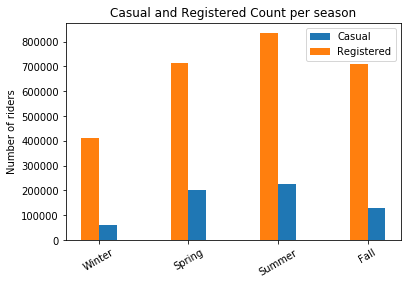

Text(0, 0.5, 'Percent of riders')

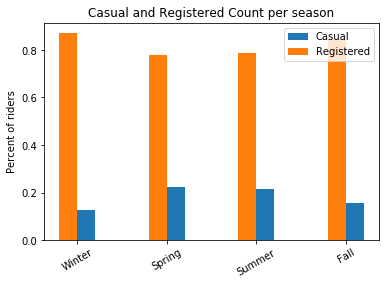

In [8]:
plt.bar(agg_by_season.index, agg_by_season['casual'], width=.2, align='edge')

plt.bar(agg_by_season.index, agg_by_season['registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count per season")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Number of riders")
plt.show()

plt.bar(agg_by_season.index, agg_by_season['percent_casual'], width=.2, align='edge')

plt.bar(agg_by_season.index, agg_by_season['percent_registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count per season")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Percent of riders")


In [9]:
corr_df = df[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

In [10]:
corr_df = corr_df.apply(lambda x: round(x, 2))

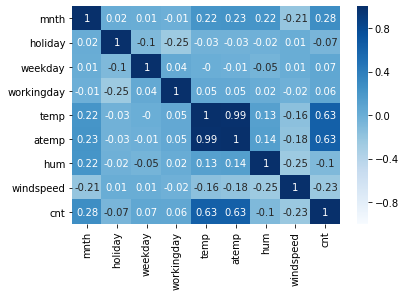

In [11]:
import seaborn as sns
# plot the heatmap
sns.heatmap(corr_df, 
        xticklabels=corr_df.columns,
        yticklabels=corr_df.columns, vmax=1.0, vmin=-1.0, annot=True, cmap='Blues')

In [12]:
df['weathersit'][df['weathersit'] == 1] = 'Clear'
df['weathersit'][df['weathersit'] == 2] = 'Cloudy'
df['weathersit'][df['weathersit'] == 3] = 'Light rain'
df['weathersit'][df['weathersit'] == 4] = 'Heavy rain'

In [13]:
agg_by_weather = df.groupby(['weathersit'])['casual', 'registered', 'cnt'].agg(lambda col: sum(col))
agg_by_weather = agg_by_weather.reindex(['Clear', 'Cloudy', 'Light rain', 'Heavy rain'])
agg_by_weather['percent_casual'] = agg_by_weather['casual'] / agg_by_weather['cnt']
agg_by_weather['percent_registered'] = agg_by_weather['registered'] / agg_by_weather['cnt']

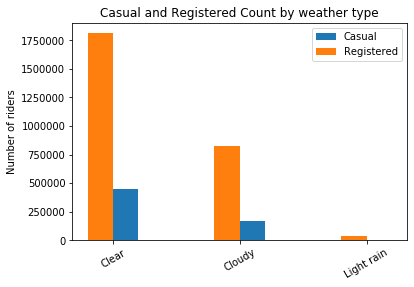

Text(0, 0.5, 'Percent of riders')

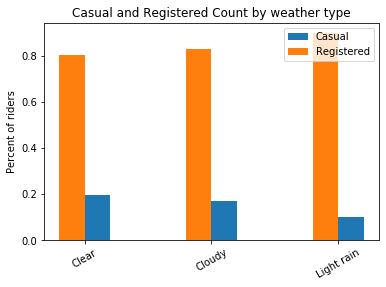

In [14]:
plt.bar(agg_by_weather.index, agg_by_weather['casual'], width=.2, align='edge')

plt.bar(agg_by_weather.index, agg_by_weather['registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count by weather type")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Number of riders")
plt.show()

plt.bar(agg_by_weather.index, agg_by_weather['percent_casual'], width=.2, align='edge')

plt.bar(agg_by_weather.index, agg_by_weather['percent_registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count by weather type")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Percent of riders")


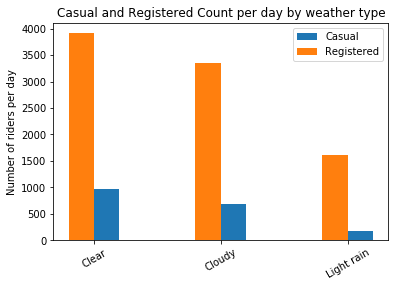

Text(0, 0.5, 'Percent of riders')

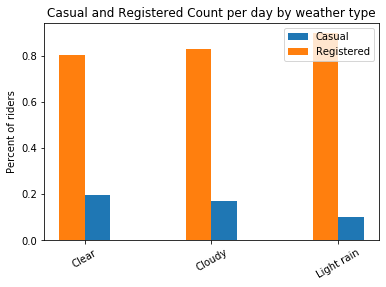

In [15]:
agg_by_weather = df.groupby(['weathersit'])['casual', 'registered', 'cnt'].agg(lambda col: sum(col)/len(col))
agg_by_weather = agg_by_weather.reindex(['Clear', 'Cloudy', 'Light rain', 'Heavy rain'])
agg_by_weather['percent_casual'] = agg_by_weather['casual'] / agg_by_weather['cnt']
agg_by_weather['percent_registered'] = agg_by_weather['registered'] / agg_by_weather['cnt']
plt.bar(agg_by_weather.index, agg_by_weather['casual'], width=.2, align='edge')

plt.bar(agg_by_weather.index, agg_by_weather['registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count per day by weather type")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Number of riders per day")
plt.show()

plt.bar(agg_by_weather.index, agg_by_weather['percent_casual'], width=.2, align='edge')

plt.bar(agg_by_weather.index, agg_by_weather['percent_registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count per day by weather type")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Percent of riders")


In [16]:
df['weathersit'].value_counts()

Clear         463
Cloudy        247
Light rain     21
Name: weathersit, dtype: int64

In [17]:
df[df['cnt'] < 450]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,percent_casual,percent_registered
26,27,2011-01-27,Winter,0,1,0,4,1,Clear,0.195000,0.219700,0.687500,0.113837,15,416,431,0.034803,0.965197
667,668,2012-10-29,Fall,1,10,0,1,1,Light rain,0.440000,0.439400,0.880000,0.358200,2,20,22,0.090909,0.909091
725,726,2012-12-26,Winter,1,12,0,3,1,Light rain,0.243333,0.220333,0.823333,0.316546,9,432,441,0.020408,0.979592


In [18]:
hour_df = pd.read_csv("Bike-Sharing-Dataset/hour.csv")

In [19]:
hour_df[hour_df['weathersit'] == 4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


In [20]:
df['weekday'][df['weekday'] == 0] = 'Sunday'
df['weekday'][df['weekday'] == 1] = 'Monday'
df['weekday'][df['weekday'] == 2] = 'Tuesday'
df['weekday'][df['weekday'] == 3] = 'Wednesday'
df['weekday'][df['weekday'] == 4] = 'Thursday'
df['weekday'][df['weekday'] == 5] = 'Friday'
df['weekday'][df['weekday'] == 6] = 'Saturday'
agg_by_day = df.groupby(['weekday'])['casual', 'registered', 'cnt'].agg(lambda col: sum(col))

agg_by_day = agg_by_day.reindex(['Sunday',
'Monday',
'Tuesday',
'Wednesday',
'Thursday',
'Friday',
'Saturday',])
agg_by_day['percent_casual'] = agg_by_day['casual'] / agg_by_day['cnt']
agg_by_day['percent_registered'] = agg_by_day['registered'] / agg_by_day['cnt']


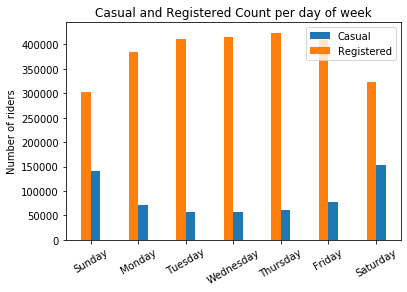

Text(0, 0.5, 'Percent of riders')

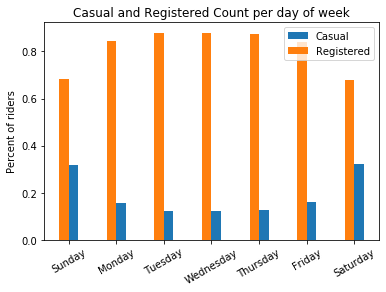

In [21]:
plt.bar(agg_by_day.index, agg_by_day['casual'], width=.2, align='edge')

plt.bar(agg_by_day.index, agg_by_day['registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count per day of week")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Number of riders")
plt.show()

plt.bar(agg_by_day.index, agg_by_day['percent_casual'], width=.2, align='edge')

plt.bar(agg_by_day.index, agg_by_day['percent_registered'], width=-.2, align='edge')
plt.title("Casual and Registered Count per day of week")
plt.legend(['Casual', 'Registered'])
plt.xticks(rotation=30)
plt.ylabel("Percent of riders")
